# Comparing Male and Female Hippocampus Responses to Natural Scenes and Natural Movies

### Name: Deborah Agorua    


### Date: 10/15/2022


### PID: 730397647


### Jupyter Notebook Number: 56231191

## Purpose/Objective:
Fix charts by getting accurate firing rate means and perform statistic tests on data and add significance bars to graphs

## Protocol:
1. Make charts with accurate firing rate data
2. Do unpaired t-tests comparing male and female firing rate in all 3 hippocampus regions in response to natural scenes and natural movies
3. Add significance bars to graphs

## Expected Results:
T-test values and graphs with accurate firing rate data and significance bars

### Installing AllenSDK into your local environment. 

In [1]:
pip install allensdk

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Import Packages:

In [1]:
import os
import shutil
import allensdk
import pprint
from pathlib import Path

import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

### If working with Visual Coding: Neuropixels Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

In [2]:
#this code block should only be run if you are working with the neuropixels data
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

data_directory = '/overflow/NSCI274/projects/ecephysdata/' 

manifest_path = os.path.join(data_directory, "manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

### Import sessions data

In [3]:
data_directory = "/overflow/NSCI274/projects/ecephysdata/"

manifest_path = os.path.join(data_directory,"manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [4]:
sessions = cache.get_session_table()

print('Total number of sessions: ' + str(len(sessions)))

sessions.head()

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


### Discover the number of sessions for male mice and female mice

In [5]:
filtered_sessionsm = sessions[(sessions.sex == 'M') & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['DG' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

print('Total number of male sessions: ' + str(len(filtered_sessionsm)))

filtered_sessionsm.head()

Total number of male sessions: 22


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
743475441,2019-10-03T00:00:00Z,722882755,brain_observatory_1.1,121.0,M,wt/wt,553,2225,6,"[LP, LGd, HPF, DG, CA3, CA1, VISrl, nan, PP, P..."
744228101,2019-10-03T00:00:00Z,719817805,brain_observatory_1.1,122.0,M,wt/wt,659,2226,6,"[Eth, TH, LP, POL, APN, DG, CA1, VIS, nan, CA3..."


In [6]:
filtered_sessionsm_ca1 = sessions[(sessions.sex == 'M') & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['CA1' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

print('Total number of male sessions: ' + str(len(filtered_sessionsm_ca1)))

filtered_sessionsm_ca1.head()

Total number of male sessions: 22


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
743475441,2019-10-03T00:00:00Z,722882755,brain_observatory_1.1,121.0,M,wt/wt,553,2225,6,"[LP, LGd, HPF, DG, CA3, CA1, VISrl, nan, PP, P..."
744228101,2019-10-03T00:00:00Z,719817805,brain_observatory_1.1,122.0,M,wt/wt,659,2226,6,"[Eth, TH, LP, POL, APN, DG, CA1, VIS, nan, CA3..."


In [7]:
filtered_sessionsm_ca3 = sessions[(sessions.sex == 'M') & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['CA3' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

print('Total number of CA3 male sessions: ' + str(len(filtered_sessionsm_ca1)))

filtered_sessionsm_ca1.head()

Total number of CA3 male sessions: 22


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
743475441,2019-10-03T00:00:00Z,722882755,brain_observatory_1.1,121.0,M,wt/wt,553,2225,6,"[LP, LGd, HPF, DG, CA3, CA1, VISrl, nan, PP, P..."
744228101,2019-10-03T00:00:00Z,719817805,brain_observatory_1.1,122.0,M,wt/wt,659,2226,6,"[Eth, TH, LP, POL, APN, DG, CA1, VIS, nan, CA3..."


In [9]:
# filtered_sessions_scenes = sessions[(session.stimulus_name == 'natural_scenes') & \
#                              (sessions.session_type == 'brain_observatory_1.1') & \
#                              (['DG' in acronyms for acronyms in 
#                                sessions.ecephys_structure_acronyms])]

# print('Total number of male sessions: ' + str(len(filtered_sessionsm)))

# filtered_sessionsm.head()

In [8]:
filtered_sessionsf = sessions[(sessions.sex == 'F') & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['DG' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

print('Total number of DG female sessions: ' + str(len(filtered_sessionsf)))

filtered_sessionsf.head()

Total number of DG female sessions: 3


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
751348571,2019-10-03T00:00:00Z,732548380,brain_observatory_1.1,93.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,859,2217,6,"[grey, LGv, CA3, DG, CA1, VISl, nan, APN, POL,..."
773418906,2019-10-03T00:00:00Z,757329624,brain_observatory_1.1,124.0,F,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,546,2232,6,"[PPT, NOT, SUB, ProS, CA1, VISam, nan, APN, DG..."
798911424,2019-10-03T00:00:00Z,775876828,brain_observatory_1.1,110.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,825,2233,6,"[APN, TH, Eth, LP, DG, HPF, CA3, CA1, VISrl, n..."


In [9]:
filtered_sessionsf_ca1 = sessions[(sessions.sex == 'F') & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['CA1' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

print('Total number of CA1 female sessions: ' + str(len(filtered_sessionsf_ca1)))

filtered_sessionsf_ca1.head()

Total number of CA1 female sessions: 4


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
746083955,2019-10-03T00:00:00Z,726170935,brain_observatory_1.1,98.0,F,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,582,2216,6,"[VPM, TH, LGd, CA3, CA2, CA1, VISal, nan, grey..."
751348571,2019-10-03T00:00:00Z,732548380,brain_observatory_1.1,93.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,859,2217,6,"[grey, LGv, CA3, DG, CA1, VISl, nan, APN, POL,..."
773418906,2019-10-03T00:00:00Z,757329624,brain_observatory_1.1,124.0,F,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,546,2232,6,"[PPT, NOT, SUB, ProS, CA1, VISam, nan, APN, DG..."
798911424,2019-10-03T00:00:00Z,775876828,brain_observatory_1.1,110.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,825,2233,6,"[APN, TH, Eth, LP, DG, HPF, CA3, CA1, VISrl, n..."


In [10]:
filtered_sessionsf_ca3 = sessions[(sessions.sex == 'F') & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['CA3' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

print('Total number of CA3 female sessions: ' + str(len(filtered_sessionsf_ca1)))

filtered_sessionsf_ca3.head()

Total number of CA3 female sessions: 4


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
746083955,2019-10-03T00:00:00Z,726170935,brain_observatory_1.1,98.0,F,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,582,2216,6,"[VPM, TH, LGd, CA3, CA2, CA1, VISal, nan, grey..."
751348571,2019-10-03T00:00:00Z,732548380,brain_observatory_1.1,93.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,859,2217,6,"[grey, LGv, CA3, DG, CA1, VISl, nan, APN, POL,..."
773418906,2019-10-03T00:00:00Z,757329624,brain_observatory_1.1,124.0,F,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,546,2232,6,"[PPT, NOT, SUB, ProS, CA1, VISam, nan, APN, DG..."
798911424,2019-10-03T00:00:00Z,775876828,brain_observatory_1.1,110.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,825,2233,6,"[APN, TH, Eth, LP, DG, HPF, CA3, CA1, VISrl, n..."


### Create units table

In [11]:
session_idm = filtered_sessionsm.index.values[2]

sessionm = cache.get_session_data(session_idm)

session_idf = filtered_sessionsf.index.values[2]

#sessionf = cache.get_session_data(session_idf)
sessionf = cache.get_session_data(session_idf)

In [12]:
session_idm_ca1 = filtered_sessionsm_ca1.index.values[2]

sessionm_ca1 = cache.get_session_data(session_idm_ca1)

session_idf_ca1 = filtered_sessionsf_ca1.index.values[2]

#sessionf = cache.get_session_data(session_idf)
sessionf_ca1 = cache.get_session_data(session_idf_ca1)

In [13]:
session_idm_ca3 = filtered_sessionsm_ca3.index.values[2]

sessionm_ca3 = cache.get_session_data(session_idm_ca3)

session_idf_ca3 = filtered_sessionsf_ca3.index.values[2]

#sessionf = cache.get_session_data(session_idf)
sessionf_ca3 = cache.get_session_data(session_idf_ca3)

In [14]:
filtered_sessions_scenes = sessions[(sessionm.stimulus_names == 'natural_scenes') & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['DG' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]
filtered_sessions_scenes.head()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,


In [15]:
unitsm = sessionm.units

print('Total number of male units: ' + str(len(unitsm)))
themlist=unitsm['ecephys_structure_acronym'].to_list()
resmlist=[*set(themlist)]
print(resmlist)
unitsm.head()

Total number of male units: 444
['VISl', 'LGv', 'CA3', 'VISam', 'DG', 'MB', 'VISrl', 'CA1', 'VIS', 'VISp', 'POL', 'APN', 'VISal', 'SCig', 'LP']


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
950907205,1.054721,101.262915,0.012123,1,250.13,5.252421,14.739577,0.005100,129.172458,0.002403,...,313.0,MB,8456.0,3144.0,6920.0,probeA,See electrode locations,29999.970785,1249.998783,True
950907524,0.558508,136.843200,0.002313,154,279.40,5.439966,1.448536,0.000000,50.450187,0.004085,...,313.0,MB,8447.0,3127.0,6924.0,probeA,See electrode locations,29999.970785,1249.998783,True
950907209,0.637890,114.131278,0.084063,3,0.00,3.246909,0.040263,0.000000,19.926951,0.023899,...,313.0,MB,8447.0,3127.0,6924.0,probeA,See electrode locations,29999.970785,1249.998783,True
950907526,0.576049,85.886190,0.024568,155,532.46,5.347055,0.376838,0.000000,66.773857,0.000197,...,313.0,MB,8433.0,3102.0,6929.0,probeA,See electrode locations,29999.970785,1249.998783,True
950907216,0.651440,79.630785,0.002750,6,262.20,5.657655,8.277175,0.007249,89.982684,0.002184,...,313.0,MB,8419.0,3077.0,6934.0,probeA,See electrode locations,29999.970785,1249.998783,True


In [17]:
unitsm_ca1 = sessionm_ca1.units

print('Total number of male units: ' + str(len(unitsm_ca1)))
themlistca1=unitsm_ca1['ecephys_structure_acronym'].to_list()
resmlistca1=[*set(themlistca1)]
print(resmlistca1)
unitsm_ca1.head()

Total number of male units: 444
['VISl', 'LGv', 'CA3', 'VISam', 'DG', 'MB', 'VISrl', 'CA1', 'VIS', 'VISp', 'POL', 'APN', 'VISal', 'SCig', 'LP']


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
950907205,1.054721,101.262915,0.012123,1,250.13,5.252421,14.739577,0.005100,129.172458,0.002403,...,313.0,MB,8456.0,3144.0,6920.0,probeA,See electrode locations,29999.970785,1249.998783,True
950907524,0.558508,136.843200,0.002313,154,279.40,5.439966,1.448536,0.000000,50.450187,0.004085,...,313.0,MB,8447.0,3127.0,6924.0,probeA,See electrode locations,29999.970785,1249.998783,True
950907209,0.637890,114.131278,0.084063,3,0.00,3.246909,0.040263,0.000000,19.926951,0.023899,...,313.0,MB,8447.0,3127.0,6924.0,probeA,See electrode locations,29999.970785,1249.998783,True
950907526,0.576049,85.886190,0.024568,155,532.46,5.347055,0.376838,0.000000,66.773857,0.000197,...,313.0,MB,8433.0,3102.0,6929.0,probeA,See electrode locations,29999.970785,1249.998783,True
950907216,0.651440,79.630785,0.002750,6,262.20,5.657655,8.277175,0.007249,89.982684,0.002184,...,313.0,MB,8419.0,3077.0,6934.0,probeA,See electrode locations,29999.970785,1249.998783,True


In [18]:
unitsm_ca3= sessionm_ca3.units

In [19]:
unitsf = sessionf.units

print('Total number of female units: ' + str(len(unitsf)))
thelist=unitsf['ecephys_structure_acronym'].to_list()
reslist=[*set(thelist)]
print(reslist)
unitsf.head(100)

Total number of female units: 825
['VISl', 'LGv', 'TH', 'CA3', 'Eth', 'NOT', 'VISam', 'DG', 'MB', 'VISal', 'VISrl', 'CA1', 'VISp', 'APN', 'SUB', 'ProS', 'LP', 'CA2']


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951088679,0.620607,82.147455,0.023654,1,480.97,2.575648,7.429131,0.053350,51.364291,0.028062,...,215.0,APN,8328.0,3018.0,7095.0,probeA,See electrode locations,29999.965974,1249.998582,True
951088664,0.587044,78.399165,0.001739,0,427.07,3.085334,6.843864,0.033732,40.358293,0.051513,...,215.0,APN,8328.0,3018.0,7095.0,probeA,See electrode locations,29999.965974,1249.998582,True
951088734,0.560996,187.504005,0.001249,5,311.01,5.152564,1.418476,0.356931,56.950961,0.001292,...,215.0,APN,8316.0,2988.0,7099.0,probeA,See electrode locations,29999.965974,1249.998582,True
951088721,0.474457,196.741545,0.000059,4,355.17,4.295014,11.517381,0.000271,58.358552,0.020218,...,215.0,APN,8316.0,2988.0,7099.0,probeA,See electrode locations,29999.965974,1249.998582,True
951088862,0.534674,92.125020,0.089901,16,239.50,4.043348,19.953126,0.013619,79.934237,0.011335,...,215.0,APN,8304.0,2958.0,7103.0,probeA,See electrode locations,29999.965974,1249.998582,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951092912,0.343048,74.986080,0.015427,306,331.55,2.625901,3.275160,0.050214,51.855880,0.003558,...,394.0,VISam,7687.0,819.0,7500.0,probeA,See electrode locations,29999.965974,1249.998582,True
951094783,0.062807,109.564845,0.001595,443,193.46,3.262489,5.224870,0.040776,59.900239,0.002028,...,394.0,VISam,7682.0,801.0,7503.0,probeA,See electrode locations,29999.965974,1249.998582,True
951093080,0.576623,107.448315,0.029407,320,76.37,4.238720,30.788574,0.004470,106.205546,0.000916,...,394.0,VISam,7682.0,801.0,7503.0,probeA,See electrode locations,29999.965974,1249.998582,True


In [20]:
unitsf_ca1= sessionf_ca1.units

print('Total number of female units: ' + str(len(unitsf_ca1)))
thelistca1=unitsf_ca1['ecephys_structure_acronym'].to_list()
reslistca1=[*set(thelistca1)]
print(reslistca1)
unitsf_ca1.head(100)

Total number of female units: 546
['TH', 'CA3', 'NOT', 'VISam', 'DG', 'VISmmp', 'MB', 'VISal', 'VISrl', 'CA1', 'VISp', 'APN', 'SUB', 'MGd', 'ProS', 'MGv']


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951781164,0.397729,74.728680,0.080107,6,102.08,3.184190,14.848563,0.107623,63.568084,0.036502,...,484682470.0,ProS,8017.0,1857.0,7179.0,probeA,See electrode locations,29999.964439,1249.998518,True
951781179,0.404661,95.422080,0.011366,9,77.17,4.840396,11.982257,0.049019,75.035952,0.008291,...,382.0,CA1,8010.0,1824.0,7199.0,probeA,See electrode locations,29999.964439,1249.998518,True
951781341,0.594550,42.931785,0.001880,48,315.04,2.944735,4.698033,0.031364,86.322527,0.008108,...,394.0,VISam,7814.0,890.0,7491.0,probeA,See electrode locations,29999.964439,1249.998518,True
951781346,0.338191,107.153280,0.000154,49,144.72,4.099752,7.144577,0.000000,74.737358,0.012747,...,394.0,VISam,7807.0,857.0,7490.0,probeA,See electrode locations,29999.964439,1249.998518,True
951781375,0.577122,105.278550,0.001077,56,159.15,4.255690,11.999290,0.053956,61.066084,0.036021,...,394.0,VISam,7801.0,832.0,7489.0,probeA,See electrode locations,29999.964439,1249.998518,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951785333,0.622722,87.587175,0.093573,80,109.07,3.541663,19.480415,0.079757,62.424747,0.030794,...,502.0,SUB,8713.0,2092.0,7827.0,probeC,See electrode locations,29999.995177,1249.999799,True
951785385,0.463898,27.936870,0.006592,91,320.20,2.567400,4.526989,0.210188,45.361948,0.088020,...,385.0,VISp,8933.0,1485.0,7995.0,probeC,See electrode locations,29999.995177,1249.999799,True
951785427,0.495986,39.382395,0.000254,100,191.93,3.394125,2.363741,0.082598,50.542769,0.016098,...,385.0,VISp,8957.0,1415.0,8001.0,probeC,See electrode locations,29999.995177,1249.999799,True


In [21]:
unitsf_ca3= sessionf_ca3.units

### Filter units for Hippocampus Areas

In [22]:
DG_unitsm = unitsm[(unitsm.ecephys_structure_acronym == 'DG')]

print('Total number of DG units: ' + str(len(DG_unitsm)))

DG_unitsm.head()

Total number of DG units: 41


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
950907256,8.229653,95.517010,0.036145,24,0.00,NaN,0.060853,0.000000,NaN,NaN,...,726.0,DG,7988.0,2274.0,7154.0,probeA,See electrode locations,29999.970785,1249.998783,True
950907719,0.502406,236.327130,0.000141,61,61.46,6.647542,19.238828,0.016309,116.666580,0.001909,...,726.0,DG,7567.0,2175.0,7376.0,probeB,See electrode locations,29999.923119,1249.996797,True
950907721,1.413915,91.812045,0.020535,62,557.58,5.496564,7.212420,0.008813,68.094419,0.003849,...,726.0,DG,7571.0,2144.0,7379.0,probeB,See electrode locations,29999.923119,1249.996797,True
950907717,0.271389,135.051930,0.001925,60,105.04,5.201824,3.694890,0.039178,51.061316,0.027779,...,726.0,DG,7571.0,2144.0,7379.0,probeB,See electrode locations,29999.923119,1249.996797,True
950907733,0.326786,110.713395,0.097751,68,250.69,3.088837,5.344538,0.120377,48.654929,0.032234,...,726.0,DG,7575.0,2103.0,7383.0,probeB,See electrode locations,29999.923119,1249.996797,True


In [23]:
DG_unitsf = unitsf[(unitsf.ecephys_structure_acronym == 'DG')]

print('Total number of female DG units: ' + str(len(DG_unitsf)))

DG_unitsf.head()

Total number of female DG units: 31


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951090214,0.585876,112.724820,0.000105,105,73.01,6.211980,10.497929,0.028347,71.667279,0.004208,...,726.0,DG,8019.0,2162.0,7291.0,probeA,See electrode locations,29999.965974,1249.998582,True
951099104,2.118498,44.899725,0.063431,302,266.39,3.514698,10.437201,0.007911,91.509599,0.004821,...,726.0,DG,7747.0,2334.0,7452.0,probeB,See electrode locations,29999.917201,1249.996550,True
951095747,0.534207,154.266645,0.000431,62,65.84,4.256822,3.500400,0.000000,71.319775,0.008970,...,726.0,DG,7747.0,2334.0,7452.0,probeB,See electrode locations,29999.917201,1249.996550,True
951095759,0.261311,110.880510,0.001318,64,102.72,5.066305,1.408227,0.000000,74.749922,0.000563,...,726.0,DG,7750.0,2312.0,7451.0,probeB,See electrode locations,29999.917201,1249.996550,True
951095847,0.327950,34.730475,0.056136,69,108.71,2.694005,0.130964,0.000000,33.023656,0.016339,...,726.0,DG,7754.0,2282.0,7449.0,probeB,See electrode locations,29999.917201,1249.996550,True


In [24]:
CA1_unitsm = unitsm_ca1[(unitsm.ecephys_structure_acronym == 'CA1')]

print('Total number of male CA1 units: ' + str(len(CA1_unitsm)))

CA1_unitsm.head()

Total number of male CA1 units: 71


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
950907546,0.244961,122.157165,0.000854,165,127.42,4.346751,4.082628,0.082517,58.423581,0.011486,...,382.0,CA1,7698.0,1633.0,7510.0,probeA,See electrode locations,29999.970785,1249.998783,True
950907296,0.304593,72.153510,0.033786,43,158.56,4.418858,4.882172,0.309350,66.664742,0.002773,...,382.0,CA1,7690.0,1614.0,7523.0,probeA,See electrode locations,29999.970785,1249.998783,True
950907552,0.269583,90.767235,0.021036,168,143.71,4.718096,4.488108,0.434338,71.190553,0.001355,...,382.0,CA1,7682.0,1595.0,7537.0,probeA,See electrode locations,29999.970785,1249.998783,True
950907301,0.425438,179.623275,0.000147,45,84.29,7.952308,10.390707,0.000000,124.364300,0.000006,...,382.0,CA1,7682.0,1595.0,7537.0,probeA,See electrode locations,29999.970785,1249.998783,True
950907306,0.346616,90.277590,0.014060,47,91.75,3.999452,7.578033,0.304699,62.652103,0.021101,...,382.0,CA1,7666.0,1557.0,7564.0,probeA,See electrode locations,29999.970785,1249.998783,True


In [25]:
CA1_unitsf = unitsf_ca1[(unitsf_ca1.ecephys_structure_acronym == 'CA1')]

print('Total number of female CA1 units: ' + str(len(CA1_unitsf)))

CA1_unitsf.head()

Total number of female CA1 units: 72


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951781179,0.404661,95.422080,0.011366,9,77.17,4.840396,11.982257,0.049019,75.035952,0.008291,...,382.0,CA1,8010.0,1824.0,7199.0,probeA,See electrode locations,29999.964439,1249.998518,True
951779435,0.462240,169.897650,0.000269,51,43.15,7.119629,8.374772,0.000548,92.099760,0.001167,...,382.0,CA1,8110.0,3283.0,9130.0,probeD,See electrode locations,29999.917865,1249.996578,True
951779456,0.394235,111.949305,0.003782,55,69.59,5.992602,5.857313,0.015694,80.163813,0.003619,...,382.0,CA1,8129.0,3256.0,9158.0,probeD,See electrode locations,29999.917865,1249.996578,True
951779469,0.212392,63.219585,0.080877,57,130.82,5.095083,7.187714,0.074440,53.984054,0.017591,...,382.0,CA1,8135.0,3247.0,9167.0,probeD,See electrode locations,29999.917865,1249.996578,True
951779510,0.288704,153.110685,0.000301,65,59.07,10.259920,4.912612,0.001594,95.394609,0.000003,...,382.0,CA1,8193.0,3173.0,9248.0,probeD,See electrode locations,29999.917865,1249.996578,True


In [26]:
CA3_unitsm = unitsm_ca3[(unitsm_ca3.ecephys_structure_acronym == 'CA3')]

print('Total number of male CA3 units: ' + str(len(CA3_unitsm)))

CA3_unitsm.head()

Total number of male CA3 units: 10


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
950909583,0.410678,116.500800,0.032153,270,280.39,5.261019,6.622643,0.006098,59.768920,0.013978,...,463.0,CA3,7927.0,3370.0,8666.0,probeD,See electrode locations,29999.923530,1249.996814,True
950909164,0.812153,118.097460,0.012017,65,250.94,3.459251,13.927610,0.083509,56.290464,0.050416,...,463.0,CA3,7944.0,3325.0,8687.0,probeD,See electrode locations,29999.923530,1249.996814,True
950909160,0.661843,121.816890,0.043753,62,273.57,2.471769,5.058720,0.182137,35.275256,0.116370,...,463.0,CA3,7944.0,3325.0,8687.0,probeD,See electrode locations,29999.923530,1249.996814,True
950911151,0.355969,150.825870,0.078970,298,195.69,2.474091,1.081448,0.297752,49.131256,0.008799,...,463.0,CA3,7812.0,2800.0,7979.0,probeE,See electrode locations,30000.003698,1250.000154,True
950910006,0.377384,168.359685,0.020772,73,154.47,2.932607,5.841432,0.055563,83.053982,0.001869,...,463.0,CA3,7812.0,2800.0,7979.0,probeE,See electrode locations,30000.003698,1250.000154,True


In [32]:
CA3_unitsf = unitsf_ca3[(unitsf_ca3.ecephys_structure_acronym == 'CA3')]

print('Total number of female CA3 units: ' + str(len(CA3_unitsf)))

CA3_unitsf.head()

Total number of female CA3 units: 15


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951779253,0.229383,173.483895,0.012443,18,253.24,3.374577,2.296855,0.284307,50.025363,6.051228e-03,...,463.0,CA3,8028.0,3415.0,9006.0,probeD,See electrode locations,29999.917865,1249.996578,True
951779308,0.469803,226.081440,0.000215,28,73.95,7.151648,35.985151,0.003297,115.967898,1.355759e-05,...,463.0,CA3,8043.0,3387.0,9030.0,probeD,See electrode locations,29999.917865,1249.996578,True
951779304,0.467282,151.722285,0.009529,27,303.73,4.603104,3.107346,0.306692,50.044596,8.160804e-03,...,463.0,CA3,8043.0,3387.0,9030.0,probeD,See electrode locations,29999.917865,1249.996578,True
951779358,0.513716,166.787790,0.000180,37,126.60,7.221077,13.758965,0.003047,132.393888,3.005030e-07,...,463.0,CA3,8056.0,3366.0,9050.0,probeD,See electrode locations,29999.917865,1249.996578,True
951779349,0.339376,109.805475,0.000617,35,83.33,5.661848,10.752584,0.002994,127.836394,5.733434e-08,...,463.0,CA3,8053.0,3371.0,9045.0,probeD,See electrode locations,29999.917865,1249.996578,True


In [33]:
presentation_table = sessionm.stimulus_presentations[sessionm.stimulus_presentations.stimulus_name == 'natural_scenes']

presentation_table.head()

,color,contrast,frame,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,x_position,y_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
51353,null,null,92.0,null,null,null,null,5905.128132,9.0,natural_scenes,5905.378346,null,null,null,0.250214,4908
51354,null,null,114.0,null,null,null,null,5905.378346,9.0,natural_scenes,5905.628560,null,null,null,0.250214,4909
51355,null,null,114.0,null,null,null,null,5905.628560,9.0,natural_scenes,5905.878774,null,null,null,0.250214,4909
51356,null,null,0.0,null,null,null,null,5905.878774,9.0,natural_scenes,5906.128988,null,null,null,0.250214,4910
51357,null,null,37.0,null,null,null,null,5906.128988,9.0,natural_scenes,5906.379197,null,null,null,0.250208,4911


In [29]:
presentation_table = sessionm.stimulus_presentations[sessionm.stimulus_presentations.stimulus_name == 'natural_movie_one']

presentation_table.head()

,color,contrast,frame,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,x_position,y_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
22000,null,1.0,0.0,0.0,null,"[1920.0, 1080.0]",null,2848.575812,4.0,natural_movie_one,2848.609173,null,null,null,0.033361,3887
22001,null,1.0,1.0,0.0,null,"[1920.0, 1080.0]",null,2848.609173,4.0,natural_movie_one,2848.642533,null,null,null,0.033361,3888
22002,null,1.0,2.0,0.0,null,"[1920.0, 1080.0]",null,2848.642533,4.0,natural_movie_one,2848.675894,null,null,null,0.033361,3889
22003,null,1.0,3.0,0.0,null,"[1920.0, 1080.0]",null,2848.675894,4.0,natural_movie_one,2848.709254,null,null,null,0.033361,3890
22004,null,1.0,4.0,0.0,null,"[1920.0, 1080.0]",null,2848.709254,4.0,natural_movie_one,2848.742615,null,null,null,0.033361,3891


In [63]:
presentation_table = sessionm.stimulus_presentations[sessionm.stimulus_presentations.stimulus_name == 'natural_movie_three']

presentation_table.head()

,color,contrast,frame,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,x_position,y_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
3999,null,1.0,0.0,0.0,null,"[1920.0, 1080.0]",null,2218.049252,3.0,natural_movie_three,2218.082613,null,null,null,0.033361,287
4000,null,1.0,1.0,0.0,null,"[1920.0, 1080.0]",null,2218.082613,3.0,natural_movie_three,2218.115975,null,null,null,0.033361,288
4001,null,1.0,2.0,0.0,null,"[1920.0, 1080.0]",null,2218.115975,3.0,natural_movie_three,2218.149336,null,null,null,0.033361,289
4002,null,1.0,3.0,0.0,null,"[1920.0, 1080.0]",null,2218.149336,3.0,natural_movie_three,2218.182697,null,null,null,0.033361,290
4003,null,1.0,4.0,0.0,null,"[1920.0, 1080.0]",null,2218.182697,3.0,natural_movie_three,2218.216058,null,null,null,0.033361,291


### Filter spike data by sex for natural scenes and natural movies and calculate spike mean averages

In [31]:
natural_scenes_presentation_ids = sessionm.stimulus_presentations.loc[
    (sessionm.stimulus_presentations['stimulus_name'] == 'natural_scenes')
].index.values

statsm = sessionm.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_scenes_presentation_ids,
    unit_ids=DG_unitsm.index.values
)

# display the parameters associated with each condition
statsm = pd.merge(statsm, sessionm.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

print ('Male Dentate Gyrus spike data in response to natural scenes')
statsm.head()

Male Dentate Gyrus spike data in response to natural scenes


,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem,color,contrast,frame,mask,opacity,orientation,phase,size,spatial_frequency,stimulus_name,temporal_frequency,units,x_position,y_position,color_triplet
unit_id,stimulus_condition_id,,,,,,,,,,,,,,,,,,,,
950907256,4908,1,50,0.02,0.141421,0.020000,null,null,92.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null
950907717,4908,45,50,0.90,1.281740,0.181265,null,null,92.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null
950907719,4908,225,50,4.50,4.929089,0.697078,null,null,92.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null
950907721,4908,84,50,1.68,2.253704,0.318722,null,null,92.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null
950907727,4908,93,50,1.86,2.649682,0.374722,null,null,92.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null


In [87]:
from scipy.stats import sem
dg_male_scenes=statsm['spike_mean']/0.2502
standard_error_male_scenes=sem(dg_male_scenes)
dg_male_mean=dg_male_scenes.mean()

print(standard_error_male_scenes)
print('male Dentate Gyrus spike mean average in response to natural scenes:')
print(dg_male_mean)

0.12249461051326328
male Dentate Gyrus spike mean average in response to natural scenes:
9.10378071799584


In [35]:
statsmca1 = sessionm_ca1.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_scenes_presentation_ids,
    unit_ids=CA1_unitsm.index.values
)

# display the parameters associated with each condition
statsmca1 = pd.merge(statsmca1, sessionm_ca1.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

print ('Male CA1 spike data in response to natural scenes')

Male CA1 spike data in response to natural scenes


In [89]:
from scipy.stats import sem
ca1_male_scenes=statsmca1['spike_mean']/0.2502
standard_error_male_scenes_ca1=sem(ca1_male_scenes)
ca1_male_mean=ca1_male_scenes.mean()

print(standard_error_male_scenes_ca1)
print('male ca1 spike mean average in response to natural scenes:')
print(ca1_male_mean)

0.0895512739961898
male ca1 spike mean average in response to natural scenes:
10.9864528781758


In [59]:
statsmca3 = sessionm_ca3.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_scenes_presentation_ids,
    unit_ids=CA3_unitsm.index.values
)

# display the parameters associated with each condition
statsmca3 = pd.merge(statsmca3, sessionm_ca3.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

print ('Male CA3 spike data in response to natural scenes')

Male CA3 spike data in response to natural scenes


In [90]:
ca3_male_scenes=statsmca3['spike_mean']/0.2502
standard_error_male_scenes_ca3=sem(ca3_male_scenes)
ca3_male_mean=ca3_male_scenes.mean()
#print(standard_error_male_scenes_ca3)
#print('male ca3 spike mean average in response to natural scenes:')
print(ca3_male_scenes)
print(ca3_male_mean)

newca3_male_movies=statsmca3_3['spike_count']/(20*0.033361)
print(newca3_male_movies)
avg_male_movies=newca3_male_movies.mean()
print(avg_male_movies)

unit_id    stimulus_condition_id
950909160  3887                     0.799361
950909164  3887                     2.198241
950909583  3887                     1.598721
950909993  3887                     0.799361
950909997  3887                     3.597122
                                      ...   
950910002  4786                     0.399680
950910006  4786                     0.000000
950910009  4786                     0.799361
950910025  4786                     1.998401
950911151  4786                     0.000000
Name: spike_mean, Length: 9000, dtype: float64
1.1478150812682706
unit_id    stimulus_condition_id
950909160  287                      7.493780
950909164  287                      2.997512
950909583  287                      0.000000
950909993  287                      0.000000
950909997  287                      4.496268
                                      ...   
950910002  3886                     1.498756
950910006  3886                     1.498756
950910009  38

In [42]:
natural_scenes_presentation_ids = sessionf.stimulus_presentations.loc[
    (sessionf.stimulus_presentations['stimulus_name'] == 'natural_scenes')
].index.values

statsf = sessionf.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_scenes_presentation_ids,
    unit_ids=DG_unitsf.index.values
)

# display the parameters associated with each condition
statsf = pd.merge(statsf, sessionf.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

print ('Female Dentate Gyrus spike data in response to natural scenes')
statsf.head()

Female Dentate Gyrus spike data in response to natural scenes


,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem,color,contrast,frame,mask,opacity,orientation,phase,size,spatial_frequency,stimulus_name,temporal_frequency,units,x_position,y_position,color_triplet
unit_id,stimulus_condition_id,,,,,,,,,,,,,,,,,,,,
951090214,4908,168,50,3.36,2.640037,0.373358,null,null,13.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null
951095747,4908,35,50,0.70,1.865366,0.263803,null,null,13.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null
951095759,4908,1,50,0.02,0.141421,0.020000,null,null,13.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null
951095829,4908,10,50,0.20,0.494872,0.069985,null,null,13.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null
951095847,4908,2,50,0.04,0.197949,0.027994,null,null,13.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null


In [43]:
natural_scenes_presentation_ids = sessionf_ca1.stimulus_presentations.loc[
    (sessionf_ca1.stimulus_presentations['stimulus_name'] == 'natural_scenes')
].index.values

statsfca1 = sessionf_ca1.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_scenes_presentation_ids,
    unit_ids=CA1_unitsf.index.values
)

# display the parameters associated with each condition
statsfca1 = pd.merge(statsfca1, sessionf_ca1.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

print ('Female CA1 spike data in response to natural scenes')
statsfca1.head()

Female CA1 spike data in response to natural scenes


,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem,color,contrast,frame,mask,opacity,orientation,phase,size,spatial_frequency,stimulus_name,temporal_frequency,units,x_position,y_position,color_triplet
unit_id,stimulus_condition_id,,,,,,,,,,,,,,,,,,,,
951779435,4908,70,50,1.40,1.370238,0.193781,null,null,29.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null
951779456,4908,116,50,2.32,1.743091,0.246510,null,null,29.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null
951779469,4908,68,50,1.36,1.241461,0.175569,null,null,29.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null
951779510,4908,78,50,1.56,1.459102,0.206348,null,null,29.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null
951779537,4908,135,50,2.70,2.340853,0.331047,null,null,29.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null


In [91]:
ca3_female_scenes=statsfca3['spike_mean']/0.2502
standard_error_female_scenes_ca3=sem(ca3_female_scenes)
ca3_female_mean=ca3_female_scenes.mean()

print(standard_error_female_scenes_ca3)
print('female ca3 spike mean average in response to natural scenes:')
print(ca3_female_mean)

0.26032638713497636
female ca3 spike mean average in response to natural scenes:
11.12069448082995


In [92]:
dg_female_scenes=statsf['spike_mean']/0.2502
standard_error_female_scenes=sem(dg_female_scenes)
dg_female_mean=dg_female_scenes.mean()

print(standard_error_female_scenes)
print('female dentate gyrus spike mean average in response to natural scenes:')
print(dg_female_mean)

0.14063330371304916
female dentate gyrus spike mean average in response to natural scenes:
6.787890370815352


In [93]:
ca1_female_scenes=statsfca1['spike_mean']/0.2502
standard_error_female_scenes_ca1=sem(ca1_female_scenes)
ca1_female_mean=ca1_female_scenes.mean()

print(standard_error_female_scenes_ca1)
print('female ca1 spike mean average in response to natural scenes:')
print(ca1_female_mean)

0.06560210190318003
female ca1 spike mean average in response to natural scenes:
6.522942243777485


In [94]:
dg_male_scenes=statsm['spike_mean']/0.2502
standard_error_male_scenes=sem(dg_male_scenes)
dg_male_mean=dg_male_scenes.mean()

print(standard_error_male_scenes)
print('male dentate gyrus spike mean average in response to natural scenes:')
print(dg_male_mean)

0.12249461051326328
male dentate gyrus spike mean average in response to natural scenes:
9.10378071799584


In [61]:
natural_scenes_presentation_ids = sessionf_ca3.stimulus_presentations.loc[
    (sessionf_ca3.stimulus_presentations['stimulus_name'] == 'natural_scenes')
].index.values

statsfca3 = sessionf_ca3.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_scenes_presentation_ids,
    unit_ids=CA3_unitsf.index.values
)

# display the parameters associated with each condition
statsfca3 = pd.merge(statsfca3, sessionf_ca3.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

print ('Female CA3 spike data in response to natural scenes')
statsfca3.head()

Female CA3 spike data in response to natural scenes


,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem,color,contrast,frame,mask,opacity,orientation,phase,size,spatial_frequency,stimulus_name,temporal_frequency,units,x_position,y_position,color_triplet
unit_id,stimulus_condition_id,,,,,,,,,,,,,,,,,,,,
951779253,4908,14,50,0.28,0.729551,0.103174,null,null,29.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null
951779304,4908,49,50,0.98,1.647385,0.232975,null,null,29.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null
951779308,4908,592,50,11.84,4.042428,0.571686,null,null,29.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null
951779349,4908,109,50,2.18,1.902630,0.269072,null,null,29.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null
951779358,4908,99,50,1.98,2.281156,0.322604,null,null,29.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null


In [56]:
natural_scenes_presentation_ids = sessionm.stimulus_presentations.loc[
    (sessionm.stimulus_presentations['stimulus_name'] == 'natural_movie_one')
].index.values

statsm1 = sessionm.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_scenes_presentation_ids,
    unit_ids=DG_unitsm.index.values
)

# display the parameters associated with each condition
statsm1 = pd.merge(statsm1, sessionm.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)


print ('Male Dentate Gyrus spike data in response to natural movie one')
statsm1.head()

Male Dentate Gyrus spike data in response to natural movie one


,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem,color,contrast,frame,mask,opacity,orientation,phase,size,spatial_frequency,stimulus_name,temporal_frequency,units,x_position,y_position,color_triplet
unit_id,stimulus_condition_id,,,,,,,,,,,,,,,,,,,,
950907256,3887,0,20,0.00,0.000000,0.000000,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
950907717,3887,6,20,0.30,0.923381,0.206474,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
950907719,3887,16,20,0.80,1.196486,0.267542,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
950907721,3887,11,20,0.55,0.887041,0.198348,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
950907727,3887,9,20,0.45,0.998683,0.223312,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"


In [44]:
natural_scenes_presentation_ids = sessionm_ca1.stimulus_presentations.loc[
    (sessionm_ca1.stimulus_presentations['stimulus_name'] == 'natural_movie_one')
].index.values

statsmca1_1 = sessionm_ca1.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_scenes_presentation_ids,
    unit_ids=CA1_unitsm.index.values
)

# display the parameters associated with each condition
statsmca1_1 = pd.merge(statsmca1_1, sessionm_ca1.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)


print ('Male CA1 spike data in response to natural movie one')
statsmca1_1.head()

Male CA1 spike data in response to natural movie one


,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem,color,contrast,frame,mask,opacity,orientation,phase,size,spatial_frequency,stimulus_name,temporal_frequency,units,x_position,y_position,color_triplet
unit_id,stimulus_condition_id,,,,,,,,,,,,,,,,,,,,
950907296,3887,2,20,0.10,0.307794,0.068825,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
950907301,3887,11,20,0.55,0.887041,0.198348,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
950907306,3887,6,20,0.30,0.656947,0.146898,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
950907314,3887,4,20,0.20,0.695852,0.155597,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
950907319,3887,13,20,0.65,0.670820,0.150000,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"


In [45]:
natural_scenes_presentation_ids = sessionm_ca3.stimulus_presentations.loc[
    (sessionm_ca3.stimulus_presentations['stimulus_name'] == 'natural_movie_one')
].index.values

statsmca3_1 = sessionm_ca3.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_scenes_presentation_ids,
    unit_ids=CA3_unitsm.index.values
)

# display the parameters associated with each condition
statsmca3_1 = pd.merge(statsmca3_1, sessionm_ca3.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)


print ('Male CA3 spike data in response to natural movie one')
statsmca3_1.head()

Male CA3 spike data in response to natural movie one


,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem,color,contrast,frame,mask,opacity,orientation,phase,size,spatial_frequency,stimulus_name,temporal_frequency,units,x_position,y_position,color_triplet
unit_id,stimulus_condition_id,,,,,,,,,,,,,,,,,,,,
950909160,3887,4,20,0.20,0.410391,0.091766,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
950909164,3887,11,20,0.55,0.686333,0.153469,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
950909583,3887,8,20,0.40,0.598243,0.133771,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
950909993,3887,4,20,0.20,0.410391,0.091766,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
950909997,3887,18,20,0.90,1.119210,0.250263,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"


In [46]:
natural_scenes_presentation_ids = sessionf.stimulus_presentations.loc[
    (sessionf.stimulus_presentations['stimulus_name'] == 'natural_movie_one')
].index.values

statsf1 = sessionf.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_scenes_presentation_ids,
    unit_ids=DG_unitsf.index.values
)

# display the parameters associated with each condition
statsf1 = pd.merge(statsf1, sessionf.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

print ('Female DG spike data in response to natural movie one')
statsf1.head()

Female DG spike data in response to natural movie one


,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem,color,contrast,frame,mask,opacity,orientation,phase,size,spatial_frequency,stimulus_name,temporal_frequency,units,x_position,y_position,color_triplet
unit_id,stimulus_condition_id,,,,,,,,,,,,,,,,,,,,
951090214,3887,2,20,0.1,0.447214,0.1,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
951095747,3887,0,20,0.0,0.000000,0.0,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
951095759,3887,0,20,0.0,0.000000,0.0,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
951095829,3887,0,20,0.0,0.000000,0.0,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
951095847,3887,0,20,0.0,0.000000,0.0,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"


In [47]:
natural_scenes_presentation_ids = sessionf_ca1.stimulus_presentations.loc[
    (sessionf_ca1.stimulus_presentations['stimulus_name'] == 'natural_movie_one')
].index.values

statsfca1_1 = sessionf_ca1.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_scenes_presentation_ids,
    unit_ids=CA1_unitsf.index.values
)

# display the parameters associated with each condition
statsfca1_1 = pd.merge(statsfca1_1, sessionf_ca1.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

print ('Female CA1 spike data in response to natural movie one')
statsfca1_1.head()

Female CA1 spike data in response to natural movie one


,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem,color,contrast,frame,mask,opacity,orientation,phase,size,spatial_frequency,stimulus_name,temporal_frequency,units,x_position,y_position,color_triplet
unit_id,stimulus_condition_id,,,,,,,,,,,,,,,,,,,,
951779435,3887,5,20,0.25,0.550120,0.123010,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
951779456,3887,5,20,0.25,0.550120,0.123010,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
951779469,3887,1,20,0.05,0.223607,0.050000,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
951779510,3887,2,20,0.10,0.307794,0.068825,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"
951779537,3887,5,20,0.25,0.550120,0.123010,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_one,null,pix,null,null,"[1.0, 1.0, 1.0]"


In [ ]:
natural_scenes_presentation_ids = sessionf_ca3.stimulus_presentations.loc[
    (sessionf_ca3.stimulus_presentations['stimulus_name'] == 'natural_movie_one')
].index.values

statsfca3_1 = sessionf_ca3.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_scenes_presentation_ids,
    unit_ids=CA3_unitsf.index.values
)

# display the parameters associated with each condition
statsfca3_1 = pd.merge(statsfca3_1, sessionf_ca3.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

print ('Female CA3 spike data in response to natural movie one')
statsfca3_1.head()

In [49]:
natural_movies_presentation_ids = sessionm.stimulus_presentations.loc[
    (sessionm.stimulus_presentations['stimulus_name'] == 'natural_movie_three')
].index.values

statsm3 = sessionm.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_movies_presentation_ids,
    unit_ids=DG_unitsm.index.values
)

# display the parameters associated with each condition
statsm3 = pd.merge(statsm3, sessionm.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

print ('Male DG spike data in response to natural movie three')
statsm3.head()

Male DG spike data in response to natural movie three


,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem,color,contrast,frame,mask,opacity,orientation,phase,size,spatial_frequency,stimulus_name,temporal_frequency,units,x_position,y_position,color_triplet
unit_id,stimulus_condition_id,,,,,,,,,,,,,,,,,,,,
950907256,287,0,10,0.0,0.000000,0.0,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_three,null,pix,null,null,"[1.0, 1.0, 1.0]"
950907717,287,0,10,0.0,0.000000,0.0,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_three,null,pix,null,null,"[1.0, 1.0, 1.0]"
950907719,287,2,10,0.2,0.632456,0.2,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_three,null,pix,null,null,"[1.0, 1.0, 1.0]"
950907721,287,2,10,0.2,0.632456,0.2,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_three,null,pix,null,null,"[1.0, 1.0, 1.0]"
950907727,287,1,10,0.1,0.316228,0.1,null,1.0,0.0,null,1.0,0.0,null,"[1920.0, 1080.0]",null,natural_movie_three,null,pix,null,null,"[1.0, 1.0, 1.0]"


In [ ]:
natural_movies_presentation_ids = sessionm_ca1.stimulus_presentations.loc[
    (sessionm_ca1.stimulus_presentations['stimulus_name'] == 'natural_movie_three')
].index.values

statsmca1_3 = sessionm_ca1.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_movies_presentation_ids,
    unit_ids=CA1_unitsm.index.values
)

# display the parameters associated with each condition
statsmca1_3 = pd.merge(statsmca1_3, sessionm_ca1.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

print ('Male CA1 spike data in response to natural movie three')
statsmca1_3.head()

In [ ]:
natural_movies_presentation_ids = sessionm_ca3.stimulus_presentations.loc[
    (sessionm_ca3.stimulus_presentations['stimulus_name'] == 'natural_movie_three')
].index.values

statsmca3_3 = sessionm_ca3.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_movies_presentation_ids,
    unit_ids=CA3_unitsm.index.values
)

# display the parameters associated with each condition
statsmca3_3 = pd.merge(statsmca3_3, sessionm_ca3.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

print ('Male CA3 spike data in response to natural movie three')
statsmca3_3.head()

In [ ]:
natural_movies_presentation_ids = sessionf.stimulus_presentations.loc[
    (sessionf.stimulus_presentations['stimulus_name'] == 'natural_movie_three')
].index.values

statsf3 = sessionf.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_movies_presentation_ids,
    unit_ids=DG_unitsf.index.values
)

# display the parameters associated with each condition
statsf3 = pd.merge(statsf3, sessionf.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

print ('Female DG spike data in response to natural movie three')
statsf3.head()

In [ ]:
natural_movies_presentation_ids = sessionf_ca1.stimulus_presentations.loc[
    (sessionf_ca1.stimulus_presentations['stimulus_name'] == 'natural_movie_three')
].index.values

statsfca1_3 = sessionf_ca1.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_movies_presentation_ids,
    unit_ids=CA1_unitsf.index.values
)

# display the parameters associated with each condition
statsfca1_3 = pd.merge(statsfca1_3, sessionf_ca1.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

print ('Female CA1 spike data in response to natural movie three')
statsfca1_3.head()

In [ ]:
natural_movies_presentation_ids = sessionf_ca3.stimulus_presentations.loc[
    (sessionf_ca3.stimulus_presentations['stimulus_name'] == 'natural_movie_three')
].index.values

statsfca3_3 = sessionf_ca3.conditionwise_spike_statistics(
    stimulus_presentation_ids=natural_movies_presentation_ids,
    unit_ids=CA3_unitsf.index.values
)

# display the parameters associated with each condition
statsfca3_3 = pd.merge(statsfca3_3, sessionf_ca3.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

print ('Female CA3 spike data in response to natural movie three')
statsfca3_3.head()

In [95]:
male_movie=pd.concat([statsm1,statsm3])
female_movie=pd.concat([statsf1,statsf3])
dg_female_movies=female_movie['spike_mean']/0.033361
dg_male_movies=male_movie['spike_mean']//0.033361
dg_female_mean_movies=dg_female_movies.mean()
dg_male_mean_movies=dg_male_movies.mean()
from scipy.stats import sem
standard_error_male_movies=sem(dg_male_movies)
print(standard_error_male_movies)
standard_error_female_movies=sem(dg_female_movies)
print(standard_error_female_movies)

print('female dentate gyrus spike mean average in response to natural movies:')
print(dg_female_mean_movies)
print('male dentate gyrus spike mean average in response to natural movies:')
print(dg_male_mean_movies)

male_movie_ca1=pd.concat([statsmca1_1,statsmca1_3])
female_movie_ca1=pd.concat([statsfca1_1,statsfca1_3])
ca1_female_movies=female_movie_ca1['spike_mean']/0.033361
ca1_male_movies=male_movie_ca1['spike_mean']/0.033361
ca1_female_mean_movies=ca1_female_movies.mean()
ca1_male_mean_movies=ca1_male_movies.mean()
standard_error_male_movies_ca1=sem(ca1_male_movies)
print(standard_error_male_movies_ca1)
standard_error_female_movies_ca1=sem(ca1_female_movies)
print(standard_error_female_movies_ca1)

male_movie_ca3=pd.concat([statsmca3_1,statsmca3_3])
female_movie_ca3=pd.concat([statsfca3_1,statsfca3_3])
ca3_female_movies=female_movie_ca3['spike_mean']/0.033361
ca3_male_movies=male_movie_ca3['spike_mean']/0.033361
ca3_female_mean_movies=ca3_female_movies.mean()
ca3_male_mean_movies=ca3_male_movies.mean()
standard_error_male_movies_ca3=sem(ca3_male_movies)
print(standard_error_male_movies_ca3)
standard_error_female_movies_ca3=sem(ca3_female_movies)
print(standard_error_female_movies_ca3)

0.022672920368849048
0.025279190152833374
female dentate gyrus spike mean average in response to natural movies:
6.051353720502503
male dentate gyrus spike mean average in response to natural movies:
8.449739837398374
0.019421591544631817
0.01575588377103703
0.03191255646993691
0.04395033268623642


## Add significance bars to graphs

In [ ]:
import matplotlib.pyplot


"from matplotlib.markers import TICKDOWN\n\ndef significance_bar(start,end,height,displaystring,linewidth = 1.2,markersize = 8,boxpad  =0.3,fontsize = 15,color = 'k'):\n    # draw a line with downticks at the ends\n    plt.plot([start,end],[height]*2,'-',color = color,lw=linewidth,marker = TICKDOWN,markeredgewidth=linewidth,markersize = markersize)\n    # draw the text with a bounding box covering up the line\n    plt.text(0.5*(start+end),height,displaystring=r'***',ha = 'center',va='center',bbox=dict(facecolor='1.', edgecolor='none',boxstyle='Square,pad='+str(boxpad)),size = fontsize)\noffset=1\nheight = offset +  max(dg_female_mean,dg_male_mean)"

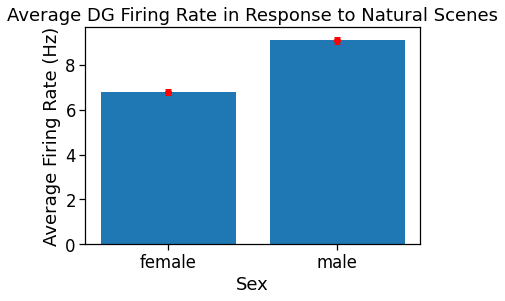

In [96]:

value_list = [dg_female_mean, dg_male_mean]
name_list=['female','male']
plt.bar(name_list, value_list)
plt.ylabel('Average Firing Rate (Hz)')
plt.xlabel('Sex')
plt.title('Average DG Firing Rate in Response to Natural Scenes')
standard_error_scenes_list=[standard_error_male_scenes, standard_error_female_scenes]
plt.errorbar(x=name_list, y=value_list, yerr=standard_error_scenes_list, fmt='o', color='r', capsize=3)

'''from matplotlib.markers import TICKDOWN

def significance_bar(start,end,height,displaystring,linewidth = 1.2,markersize = 8,boxpad  =0.3,fontsize = 15,color = 'k'):
    # draw a line with downticks at the ends
    plt.plot([start,end],[height]*2,'-',color = color,lw=linewidth,marker = TICKDOWN,markeredgewidth=linewidth,markersize = markersize)
    # draw the text with a bounding box covering up the line
    plt.text(0.5*(start+end),height,displaystring=r'***',ha = 'center',va='center',bbox=dict(facecolor='1.', edgecolor='none',boxstyle='Square,pad='+str(boxpad)),size = fontsize)
offset=1
height = offset +  max(dg_female_mean,dg_male_mean)'''




<ErrorbarContainer object of 3 artists>

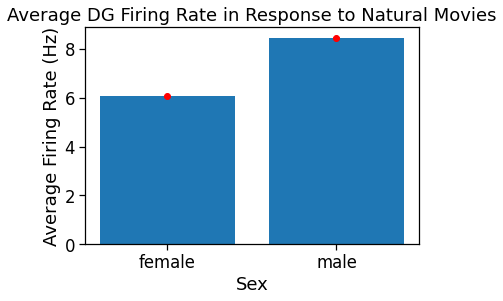

In [97]:
value_list = [dg_female_mean_movies, dg_male_mean_movies]
name_list=['female','male']
plt.bar(name_list, value_list)
plt.ylabel('Average Firing Rate (Hz)')
plt.xlabel('Sex')
plt.title('Average DG Firing Rate in Response to Natural Movies')
standard_error_movies_list=[standard_error_male_movies, standard_error_female_movies]
plt.errorbar(x=name_list, y=value_list, yerr=standard_error_movies_list, fmt='o', color='r', capsize=3)

<ErrorbarContainer object of 3 artists>

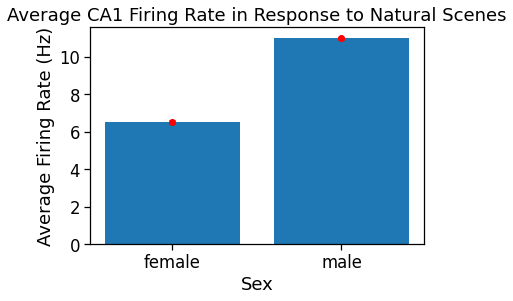

In [98]:
value_list = [ca1_female_mean, ca1_male_mean]
name_list=['female','male']
plt.bar(name_list, value_list)
plt.ylabel('Average Firing Rate (Hz)')
plt.xlabel('Sex')
plt.title('Average CA1 Firing Rate in Response to Natural Scenes')
standard_error_scenes_list_ca1=[standard_error_male_scenes_ca1, standard_error_female_scenes_ca1]
plt.errorbar(x=name_list, y=value_list, yerr=standard_error_scenes_list_ca1, fmt='o', color='r', capsize=3)

<ErrorbarContainer object of 3 artists>

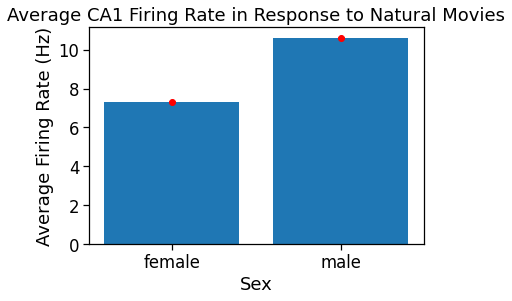

In [99]:
value_list = [ca1_female_mean_movies, ca1_male_mean_movies]
name_list=['female','male']
plt.bar(name_list, value_list)
plt.ylabel('Average Firing Rate (Hz)')
plt.xlabel('Sex')
plt.title('Average CA1 Firing Rate in Response to Natural Movies')
standard_error_movies_list_ca1=[standard_error_male_movies_ca1, standard_error_female_movies_ca1]
plt.errorbar(x=name_list, y=value_list, yerr=standard_error_movies_list_ca1, fmt='o', color='r', capsize=3)

<ErrorbarContainer object of 3 artists>

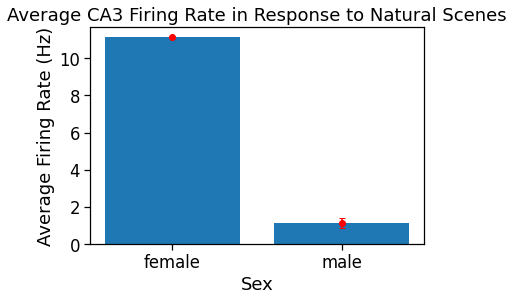

In [100]:
value_list = [ca3_female_mean, ca3_male_mean]
name_list=['female','male']
plt.bar(name_list, value_list)
plt.ylabel('Average Firing Rate (Hz)')
plt.xlabel('Sex')
plt.title('Average CA3 Firing Rate in Response to Natural Scenes')
standard_error_scenes_list_ca3=[standard_error_male_scenes_ca3, standard_error_female_scenes_ca3]
plt.errorbar(x=name_list, y=value_list, yerr=standard_error_scenes_list_ca3, fmt='o', color='r', capsize=3)

<ErrorbarContainer object of 3 artists>

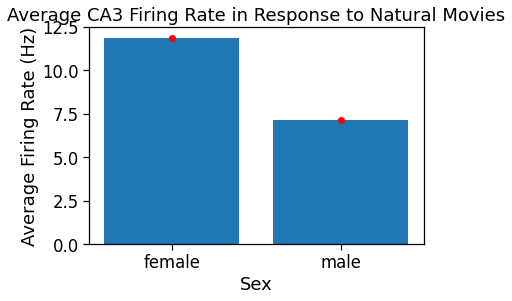

In [101]:
value_list = [ca3_female_mean_movies, ca3_male_mean_movies]
name_list=['female','male']
plt.bar(name_list, value_list)
plt.ylabel('Average Firing Rate (Hz)')
plt.xlabel('Sex')
plt.title('Average CA3 Firing Rate in Response to Natural Movies')
standard_error_movies_list_ca3=[standard_error_male_movies_ca3, standard_error_female_movies_ca3]
plt.errorbar(x=name_list, y=value_list, yerr=standard_error_movies_list_ca3, fmt='o', color='r', capsize=3)

## Do an unpaired t-test for hippocampus regions for natural scenes and natural movies

In [ ]:
from scipy import stats
dg_scenes_difference= dg_female_mean-dg_male_mean
print(f'difference of dg scenes means = {dg_scenes_difference:5.3f}')
n_dg_male_scenes=dg_male_scenes.shape[0]
n_dg_female_scenes=dg_female_scenes.shape[0]
print(f'dg male scenes n = {n_dg_male_scenes}, dg female scenes n = {n_dg_female_scenes}')
std_dg_male_scenes = dg_male_scenes.std(ddof=1)
std_dg_female_scenes = dg_female_scenes.std(ddof=1)
print(f'Standard deviations: {std_dg_male_scenes:5.3f} and {std_dg_female_scenes:5.3f}')
sed_dg_scenes = np.sqrt(std_dg_male_scenes**2 / n_dg_male_scenes + std_dg_female_scenes**2 / n_dg_female_scenes)
print(f'Standard error of the difference: {sed_dg_scenes:5.3f}')
upper_ci_dg_scenes = dg_scenes_difference + 2 * sed_dg_scenes
lower_ci_dg_scenes = dg_scenes_difference - 2 * sed_dg_scenes
print(f'Difference of the means = {dg_scenes_difference:5.3f} ({lower_ci_dg_scenes:5.3f} to {upper_ci_dg_scenes:5.3f})')
dg_scenes_statistic, dg_scenes_pvalue = stats.ttest_ind(dg_male_scenes, dg_female_scenes)
print(f'DG scenes Two-sample t-test: s = {dg_scenes_statistic:5.3f}, p = {dg_scenes_pvalue:5.3f}')

In [ ]:
dg_movies_difference= dg_female_mean_movies-dg_male_mean_movies
print(f'difference of dg movies means = {dg_movies_difference:5.3f}')
n_dg_male_movies=dg_male_movies.shape[0]
n_dg_female_movies=dg_female_movies.shape[0]
print(f'dg male movies n = {n_dg_male_movies}, dg female movies n = {n_dg_female_movies}')
std_dg_male_movies = dg_male_movies.std(ddof=1)
std_dg_female_movies = dg_female_movies.std(ddof=1)
print(f'Standard deviations: {std_dg_male_movies:5.3f} and {std_dg_female_movies:5.3f}')
sed_dg_movies = np.sqrt(std_dg_male_movies**2 / n_dg_male_movies + std_dg_female_movies**2 / n_dg_female_movies)
print(f'Standard error of the difference: {sed_dg_movies:5.3f}')
upper_ci_dg_movies = dg_movies_difference + 2 * sed_dg_movies
lower_ci_dg_movies = dg_movies_difference - 2 * sed_dg_movies
print(f'Difference of the means = {dg_movies_difference:5.3f} ({lower_ci_dg_movies:5.3f} to {upper_ci_dg_movies:5.3f})')
dg_movies_statistic, dg_movies_pvalue = stats.ttest_ind(dg_male_movies, dg_female_movies)
print(f'DG movies Two-sample t-test: s = {dg_movies_statistic:5.3f}, p = {dg_movies_pvalue:5.3f}')

In [ ]:
ca1_scenes_difference= ca1_female_mean-ca1_male_mean
print(f'difference of ca1 scenes means = {ca1_scenes_difference:5.3f}')
n_ca1_male_scenes=ca1_male_scenes.shape[0]
n_ca1_female_scenes=ca1_female_scenes.shape[0]
print(f'ca1 male scenes n = {n_ca1_male_scenes}, ca1 female scenes n = {n_ca1_female_scenes}')
std_ca1_male_scenes = ca1_male_scenes.std(ddof=1)
std_ca1_female_scenes = ca1_female_scenes.std(ddof=1)
print(f'Standard deviations: {std_ca1_male_scenes:5.3f} and {std_ca1_female_scenes:5.3f}')
sed_ca1_scenes = np.sqrt(std_ca1_male_scenes**2 / n_ca1_male_scenes + std_ca1_female_scenes**2 / n_ca1_female_scenes)
print(f'Standard error of the difference: {sed_ca1_scenes:5.3f}')
upper_ci_ca1_scenes = ca1_scenes_difference + 2 * sed_ca1_scenes
lower_ci_ca1_scenes = ca1_scenes_difference - 2 * sed_ca1_scenes
print(f'Difference of the means = {ca1_scenes_difference:5.3f} ({lower_ci_ca1_scenes:5.3f} to {upper_ci_ca1_scenes:5.3f})')
ca1_scenes_statistic, ca1_scenes_pvalue = stats.ttest_ind(ca1_male_scenes, ca1_female_scenes)
print(f'CA1 scenes Two-sample t-test: s = {ca1_scenes_statistic:5.3f}, p = {ca1_scenes_pvalue:5.3f}')

In [ ]:
ca1_movies_difference= ca1_female_mean_movies-ca1_male_mean_movies
print(f'difference of ca1 movies means = {ca1_movies_difference:5.3f}')
n_ca1_male_movies=ca1_male_movies.shape[0]
n_ca1_female_movies=ca1_female_movies.shape[0]
print(f'ca1 male movies n = {n_ca1_male_movies}, ca1 female movies n = {n_ca1_female_movies}')
std_ca1_male_movies = ca1_male_movies.std(ddof=1)
std_ca1_female_movies = ca1_female_movies.std(ddof=1)
print(f'Standard deviations: {std_ca1_male_movies:5.3f} and {std_ca1_female_movies:5.3f}')
sed_ca1_movies = np.sqrt(std_ca1_male_movies**2 / n_ca1_male_movies + std_ca1_female_movies**2 / n_ca1_female_movies)
print(f'Standard error of the difference: {sed_ca1_movies:5.3f}')
upper_ci_ca1_movies = ca1_movies_difference + 2 * sed_ca1_movies
lower_ci_ca1_movies = ca1_movies_difference - 2 * sed_ca1_movies
print(f'Difference of the means = {ca1_scenes_difference:5.3f} ({lower_ci_ca1_scenes:5.3f} to {upper_ci_ca1_scenes:5.3f})')
ca1_movies_statistic, ca1_movies_pvalue = stats.ttest_ind(ca1_male_movies, ca1_female_movies)
print(f'CA1 movies Two-sample t-test: s = {ca1_movies_statistic:5.3f}, p = {ca1_movies_pvalue:5.3f}')

In [ ]:
ca3_scenes_difference= ca3_male_mean-ca3_female_mean
print(f'difference of ca3 scenes means = {ca3_scenes_difference:5.3f}')
n_ca3_male_scenes=ca3_male_scenes.shape[0]
n_ca3_female_scenes=ca3_female_scenes.shape[0]
print(f'ca3 male scenes n = {n_ca3_male_scenes}, ca3 female scenes n = {n_ca3_female_scenes}')
std_ca3_male_scenes = ca3_male_scenes.std(ddof=1)
std_ca3_female_scenes = ca3_female_scenes.std(ddof=1)
print(f'Standard deviations: {std_ca3_male_scenes:5.3f} and {std_ca3_female_scenes:5.3f}')
sed_ca3_scenes = np.sqrt(std_ca3_male_scenes**2 / n_ca3_male_scenes + std_ca3_female_scenes**2 / n_ca3_female_scenes)
print(f'Standard error of the difference: {sed_ca3_scenes:5.3f}')
upper_ci_ca3_scenes = ca3_scenes_difference + 2 * sed_ca3_scenes
lower_ci_ca3_scenes = ca3_scenes_difference - 2 * sed_ca3_scenes
print(f'Difference of the means = {ca3_scenes_difference:5.3f} ({lower_ci_ca3_scenes:5.3f} to {upper_ci_ca3_scenes:5.3f})')
ca3_scenes_statistic, ca3_scenes_pvalue = stats.ttest_ind(ca3_male_scenes, ca3_female_scenes)
print(f'CA3 scenes Two-sample t-test: s = {ca3_scenes_statistic:5.3f}, p = {ca3_scenes_pvalue:5.3f}')

In [ ]:
ca3_movies_difference= ca3_male_mean_movies-ca3_female_mean_movies
print(f'difference of ca3 movies means = {ca3_movies_difference:5.3f}')
n_ca3_male_movies=ca3_male_movies.shape[0]
n_ca3_female_movies=ca3_female_movies.shape[0]
print(f'ca3 male movies n = {n_ca3_male_movies}, ca3 female movies n = {n_ca3_female_movies}')
std_ca3_male_movies = ca3_male_movies.std(ddof=1)
std_ca3_female_movies = ca3_female_movies.std(ddof=1)
print(f'Standard deviations: {std_ca3_male_movies:5.3f} and {std_ca3_female_movies:5.3f}')
sed_ca3_movies = np.sqrt(std_ca3_male_movies**2 / n_ca3_male_movies + std_ca3_female_movies**2 / n_ca3_female_movies)
print(f'Standard error of the difference: {sed_ca3_movies:5.3f}')
upper_ci_ca3_movies = ca3_movies_difference + 2 * sed_ca3_movies
lower_ci_ca3_movies = ca3_movies_difference - 2 * sed_ca3_movies
print(f'Difference of the means = {ca3_scenes_difference:5.3f} ({lower_ci_ca3_scenes:5.3f} to {upper_ci_ca3_scenes:5.3f})')
ca3_movies_statistic, ca3_movies_pvalue = stats.ttest_ind(ca3_male_movies, ca3_female_movies)
print(f'CA3 movies Two-sample t-test: s = {ca3_movies_statistic:5.3f}, p = {ca3_movies_pvalue:5.3f}')

### If working with Visual Coding: 2P Ca2+ Imaging Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

In [ ]:
#this code block should only be run if you are working with the brain observatory Ca2+ imaging data
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

drive_path = '/overflow/NSCI274/projects/BrainObservatoryOPhysData/'

manifest_file = os.path.join(drive_path,'manifest.json')

boc = BrainObservatoryCache(manifest_file=manifest_file)

### If working with Visual Behavior: 2P Ca2+ Imaging Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

In [ ]:
#this code block should only be run if you are working with the visual behavior Ca2+ imaging data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

data_storage_directory = Path("/overflow/NSCI274/projects/ophysdata")

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_storage_directory)

## Resources:


### Sample Allen Jupyter Notebooks to get started:
https://allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html
https://allensdk.readthedocs.io/en/latest/visual_coding_neuropixels.html


Insert text. 